In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from matplotlib.image import imread
from sklearn.preprocessing import OneHotEncoder
from matplotlib.image import imread
%matplotlib inline
from sklearn.model_selection import train_test_split
from os import listdir
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
from keras.models import load_model
from sklearn import manifold, decomposition
from sklearn import cluster, metrics

In [ ]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from keras.applications.resnet import ResNet50
from keras.models import Sequential
from keras.models import Model
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import AveragePooling2D
from keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dropout
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from PIL import Image as Image_PIL
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
path = "/Images/"
list_photo = [file for file in listdir(path)]
print(len(list_photo))

1050


In [3]:
data_pic =  pd.read_csv("data_text_final.csv")

### Sorting list_photos based on values from dataframe

In [4]:
list_photos = sorted(list_photo, key=lambda x: data_pic['image'].tolist().index(x))

In [5]:
data_pic['image_path'] = data_pic['image'].apply(lambda x: path+str(x))

In [7]:
data_pic.head(2)

,Unnamed: 0,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,...,product_rating,overall_rating,brand,product_specifications,sentence_bow,sentence_bow_lem,sentence_dl,category_lvl1,category_lvl2,image_path
0,0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...,HomeFurnishing,Curtains&Accessories,/Users/nax/Documents/Formation/Projets/Projet ...
1,1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...,BabyCare,BabyBath&Skin,/Users/nax/Documents/Formation/Projets/Projet ...


# Image display by level 1 category

# Overview of images by category

HomeFurnishing


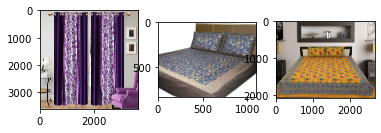

BabyCare


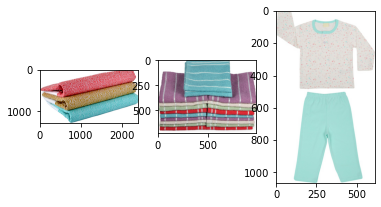

Watches


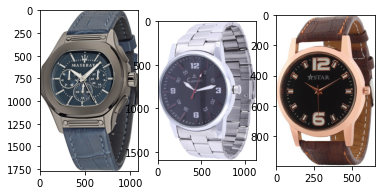

HomeDecor&FestiveNeeds


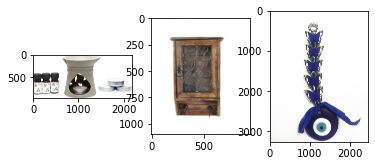

Kitchen&Dining


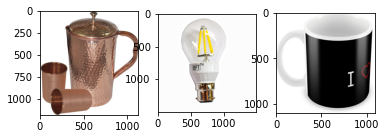

BeautyandPersonalCare


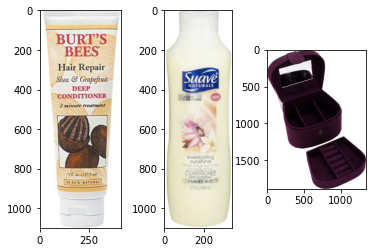

Computers


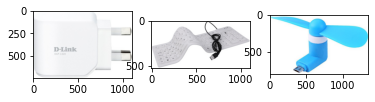

In [9]:
def list_fct(name) :
    list_image_name = [list_photos[i] for i in range(len(data_pic)) if data_pic['category_lvl1'][i]==name]
    return list_image_name

for name in data_pic['category_lvl1'].unique() :
    print(name)
    # print("-------")
    for i in range(3): #The number in range will show the number of pictures
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[i]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

## Original image

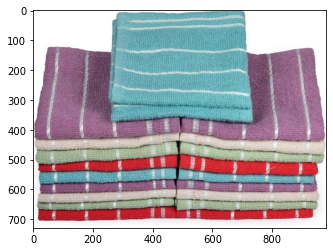

In [6]:
filename = path + list_photos[2]
image = imread(filename)
plt.imshow(image)

## Blurring

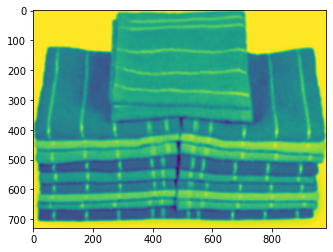

In [12]:
image = cv2.imread(path+list_photos[2],0)
ksize = (10, 10) 
image = cv2.blur(image, ksize)
plt.imshow(image)

## Improve contrast of image

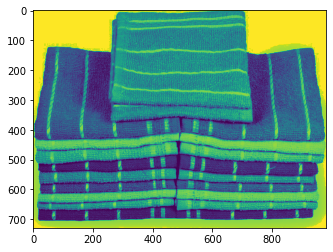

In [8]:
sift = cv2.SIFT_create()
image = cv2.imread(path+list_photos[2],0)
image = cv2.equalizeHist(image)  
plt.imshow(image)

## Compute and draw keypoints

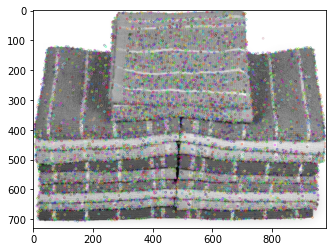

In [14]:
image = cv2.imread(path+list_photos[2],0)
kp, descriptor = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)

## Result : All treatment

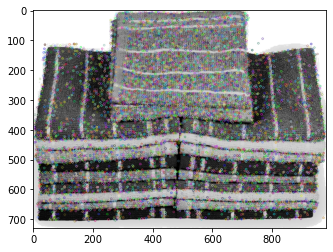

Descripteurs :  (8896, 128)

[[117.  56.   1. ...   1.   2.   0.]
 [ 30.   2.  15. ...   1.   2.   1.]
 [ 14.  19.   9. ...   1.   1.   1.]
 ...
 [ 57. 127.   9. ...   1.   1.   4.]
 [ 16.   7.   6. ...   0.   0.   0.]
 [ 26.   8.  11. ...   0.   0.   0.]]


In [10]:
sift = cv2.SIFT_create()
image = cv2.imread(path+list_photos[2],0) 
image = cv2.equalizeHist(image)   # equalize image histogram
kp, descriptor = sift.detectAndCompute(image, None) 
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

The image has 8896 descriptors of 128 length

# Split Data

We create our target variable Y (category_lvl1) and our variable X without variables correlated to 'category_lvl1'

In [13]:
onehencoder = OneHotEncoder()
onehencoder.fit(data_pic[['category_lvl1']])

OneHotEncoder()

In [14]:
#Y = onehencoder.fit_transform(np.array(data_pic['category_lvl1']).reshape(-1, 1))
Y = onehencoder.transform(data_pic[['category_lvl1']]).todense()

In [15]:
X = data_pic.drop('category_lvl1', axis=1)
#Y = data_pic['category_lvl1']
# on crée un jeux de données d'entrainement et de test avec 30% des données dans le jeu de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3, random_state=42)

# Treatment of image through SIFT

# Creation of the descriptors of each image
* For each image transition to gray and equalization
* creation of a list of descriptors per image ("sift_keypoints_by_img") which will be used to produce the histograms per image
* creation of a list of descriptors for all the images ("sift_keypoints_all") which will be used to create the descriptor clusters

In [16]:
# identification of key points and associated descriptors
import time
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000


/var/folders/x4/5yq5_q792r58vht_w3fmzyvh0000gn/T/ipykernel_3836/3533910619.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(sift_keypoints)



Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :           661.58 secondes


# Creation of descriptor clusters
* Using MiniBatchKMeans to Achieve Reasonable Processing Times

In [17]:
# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :             8.69 secondes


# Creation of image features
* For each picture : 
   - prediction of cluster numbers of each descriptor
   - creation of a histogram = count for each cluster number of the number of descriptors of the image

In [ ]:
#Features of an image = Histogram of an image = Count for an image of the number of descriptors per cluster

In [18]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :            10.10 secondes


## Dimension reductions

### PCA dimension reduction
* PCA reduction makes it possible to create features decorrelated from each other, and to reduce their dimension, while keeping a high level of explained variance (99%)
* The impact is a better separation of data via the T-SNE and a reduction in the processing time of the T-SNE

In [19]:
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 495)


### Dimension reduction T-SNE
* 2 components dimension reduction T-SNE for 2D image display

In [20]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data_pic["category_lvl1"]
print(df_tsne.shape)

/Users/nax/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1050, 3)


## Visual analysis: T-SNE display according to image categories

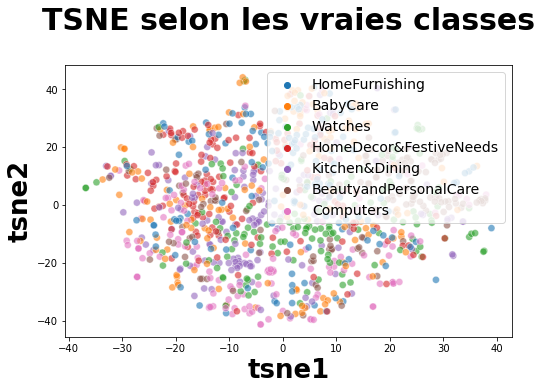

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 
plt.show()

## Measurement analysis: similarity between categories and clusters

###  Creating clusters from the T-SNE

In [22]:
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


###  Display of images according to clusters and ARI calculation of similarity categories images / clusters
* The ARI score of 0.05 remains low

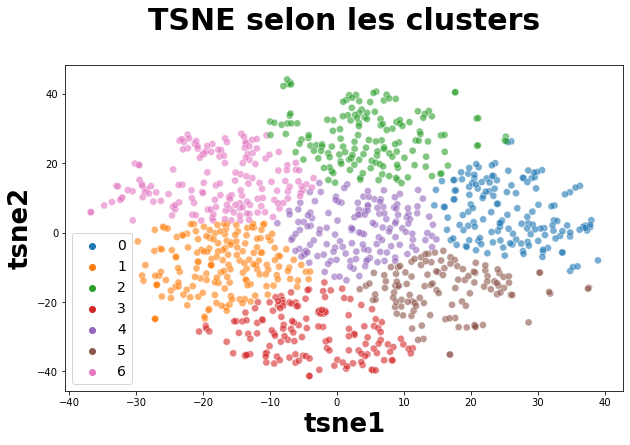

ARI :  0.06659501135056935


In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data_pic["category_lvl1"]
#labels = data_pic["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

# CNN Tranfering Learning - ResNet50

In [57]:
def redim(array_im, width, height):
    '''Redimensionne l\'image correspondant à array_im dans la largeur et la hauteur définie'''
    min_x = 100000
    max_x = 0
    min_y = 100000
    max_y = 0
    shape = array_im.shape
    if shape[0] < min_x:
        min_x = shape[0]
    elif shape[0] > max_x:
        max_x = shape[0]
    if shape[1] < min_y:
        min_y = shape[1]
    elif shape[1] > max_y:
        max_y = shape[1]
    im = cv2.resize(array_im, dsize=(width,height))
    
    del shape
    
    return im

In [117]:
def get_files(data_frame):
    '''Renvoie la liste des matrices d\'images à partir d'une liste de chemins'''
    liste_image = []
    compteur = 0
    for image_path in data_frame['image_path'].tolist():
        #im = cv2.imread(image_path, 0)
        im = np.array(Image_PIL.open(image_path))
        liste_image.append(im)
        compteur +=1
    
    del compteur
    del im
    
    return liste_image

In [58]:
X_train_cnn = get_files(X_train.copy()['image_path'].tolist())

In [60]:
X_model = np.vstack([redim(img, 224, 224).reshape(1,224,224,3) for img in X_train_cnn])

In [44]:
n_classes = data_pic['category_lvl1'].nunique()

In [89]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=n_classes,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [90]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(n_classes, activation='softmax'))

In [91]:
#resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

## Feature extraction

In [94]:
#resnet_model.fit(X_model, Y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
735/735 [==============================] - 124s 164ms/step - loss: 1.3471 - accuracy: 0.6544
Epoch 2/20
735/735 [==============================] - 129s 175ms/step - loss: 0.5503 - accuracy: 0.8327
Epoch 3/20
735/735 [==============================] - 155s 211ms/step - loss: 0.3785 - accuracy: 0.8803
Epoch 4/20
735/735 [==============================] - 131s 178ms/step - loss: 0.2572 - accuracy: 0.9129
Epoch 5/20
735/735 [==============================] - 134s 183ms/step - loss: 0.1136 - accuracy: 0.9633
Epoch 6/20
735/735 [==============================] - 122s 166ms/step - loss: 0.1189 - accuracy: 0.9646
Epoch 7/20
735/735 [==============================] - 154s 209ms/step - loss: 0.2705 - accuracy: 0.9306
Epoch 8/20
735/735 [==============================] - 119s 162ms/step - loss: 0.1392 - accuracy: 0.9565
Epoch 9/20
735/735 [==============================] - 112s 153ms/step - loss: 0.0741 - accuracy: 0.9769
Epoch 10/20
735/735 [==============================] - 143s 194m

In [98]:
#res = resnet_model

In [109]:
#resnet_model.save('resnet_fitted.h5')
res = load_model('resnet_fitted.h5')

# one-hot encoding using keras' numpy-related utilities

In [162]:
datas =[]
for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    img = cv2.imread(path+list_photos[image_num])
    #DataFrame['text'].append(pytesseract.image_to_string(img, config = conf))
    img = cv2.resize(img, (224, 224))
    ## Expanding image dims so this represents 1 sample
    img = img = np.expand_dims(img, 0)
    img = preprocess_input(img)
    extractedFeatures1 = res.predict(img)
    extractedFeatures = np.array(extractedFeatures1)
    datas.append(extractedFeatures.flatten())

0
100
200
300
400
500
600
700
800
900
1000


In [163]:
datas2 = np.asarray(datas)

In [164]:
print("Dimensions dataset avant réduction PCA : ", datas2.shape)
pca_cnn = decomposition.PCA(n_components=0.99)
feat_pca_cnn = pca_cnn.fit_transform(datas2)
print("Dimensions dataset après réduction PCA : ", feat_pca_cnn.shape)

Dimensions dataset avant réduction PCA :  (1050, 7)
Dimensions dataset après réduction PCA :  (1050, 6)


In [165]:
tsne_cnn = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne_cnn = tsne_cnn.fit_transform(feat_pca_cnn)

df_tsne_cnn = pd.DataFrame(X_tsne_cnn[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne_cnn["class"] = data_pic["category_lvl1"]
print(df_tsne_cnn.shape)

/Users/nax/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(1050, 3)


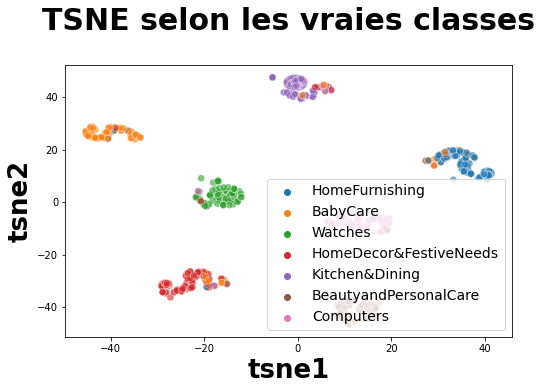

In [166]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne_cnn, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 
plt.show()

In [167]:
cls_cnn = cluster.KMeans(n_clusters=7, random_state=6)
cls_cnn.fit(X_tsne_cnn)

df_tsne_cnn["cluster"] = cls_cnn.labels_
print(df_tsne_cnn.shape)

(1050, 4)


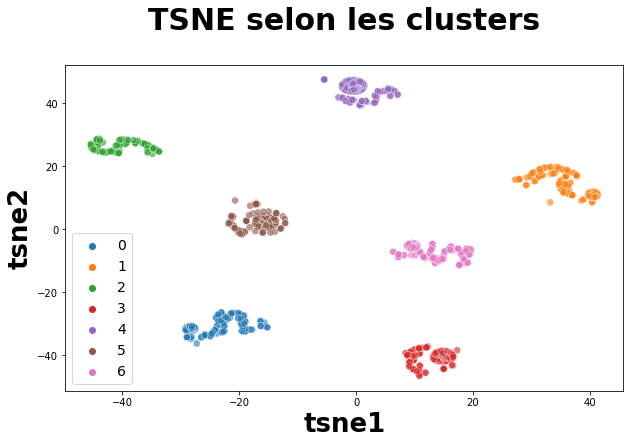

ARI :  0.4964203408630612


In [168]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne_cnn,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data_pic['category_lvl2']
print("ARI : ", metrics.adjusted_rand_score(labels, cls_cnn.labels_))